## Regression of Kpi 1 on weather data:

#### Weather-Data:
The weather data is collected from DWD weather service. Three weather parameters of primarily interest are selected. These parameters consist out of wind, rain, and temperature. The data have been measured on an hourly basis. In the case of wind and temperature they are measured in hourly mean values. In the case of rain they consits of the total ammount of precipation of the whole hour. 

#### Regression
In order to isolate the correlational effect of each weather parameter the data was also compensated for fleetsize. In the case of the data from duesseldorf there is a huge seasonal shift in fleetsize. These results in a larger number of total rentals in the warmer month. Therefore, there is a slight bias towards more rentals in warmer temperatures. This was tried to mitigate with the compensation of current fleetsize  

$ \sum_{k=1}^{no. rentals per day} \frac{1}{fleetsize} $


In [4]:
def weather_utilisation_regression (data, mode):
    
    plot_weather_regression(data, "wind", "rounded_time_hourly", mode)
    plot_weather_regression(data, "rain", "rounded_time_hourly", mode)
    plot_weather_regression(data, "temp", "rounded_time_hourly", mode)
    
    plot_weather_regression(data, "wind", "day", mode)
    plot_weather_regression(data, "rain", "day", mode)
    plot_weather_regression(data, "temp", "day", mode)
    
    
def set_dataset_absolute(data,group_by,condition):
    weather = pd.DataFrame()
    weather[condition] = data.groupby(group_by)[condition].mean()
    weather["number_ids"]= data.groupby(group_by)["b_number"].count()
    return weather


def set_dataset_compensated(data,group_by,condition):
    weather = pd.DataFrame()
    weather[condition] = data.groupby(group_by)[condition].mean()
    data["utilisation"] = data["fleetsize_weekly"].apply(lambda x: (1 / x)*100)

    weather["number_ids"]= data.groupby(group_by)["utilisation"].sum()
    return weather
    
    
    
    
    
def plot_weather_regression (data,condition,timeresolution,mode):
    if mode == "absolute":
        weather_data = set_dataset_absolute(data,timeresolution,condition)
    
    if mode == "compensated":
        weather_data = set_dataset_compensated(data,timeresolution,condition)


    X = weather_data[condition].values.reshape((-1,1)) 
    y = weather_data["number_ids"]
    # initialize model
    lin_mod = LinearRegression()
    
    

#train model
    lin_mod.fit(X, y)

#make predictions using model
    model_pred = lin_mod.predict(X)

# plot results
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, marker="x")
    plt.xlabel(condition+" "+timeresolution)
    plt.ylabel("Demand hourly")
    plt.plot(X, model_pred, c='C2')
    plt.legend(['Squared loss fit','Observed days'])
    print(lin_mod.coef_, lin_mod.intercept_)



[0.15620897] 2.3704224432729792
[-0.38019068] 3.0042389492927377
[0.12410947] 1.2516737211849434
[-3.28546487] 64.12597263899247
[-38.41855109] 50.98923881337364
[2.7080147] 12.688553763582838


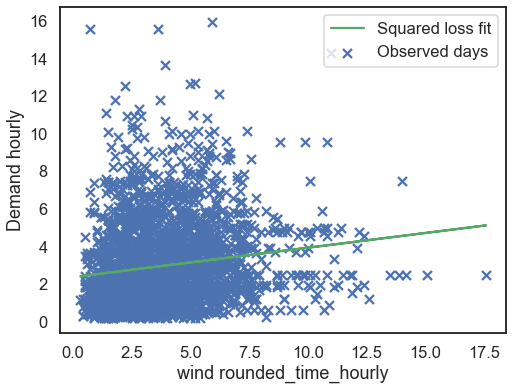

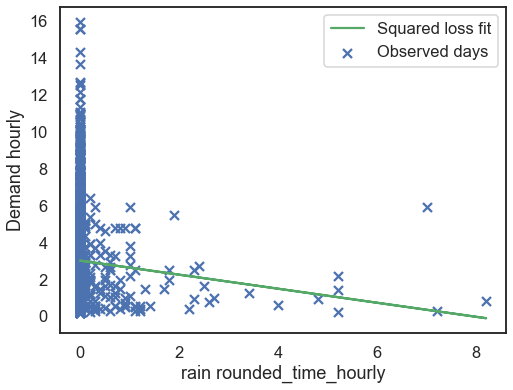

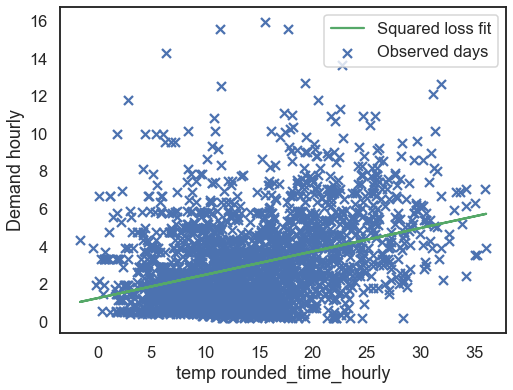

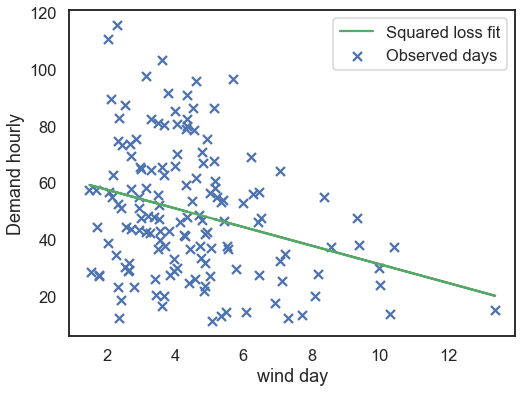

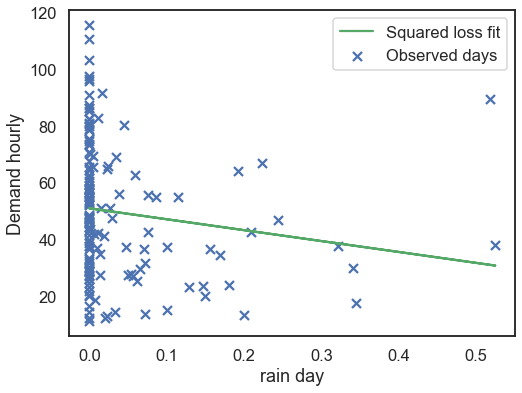

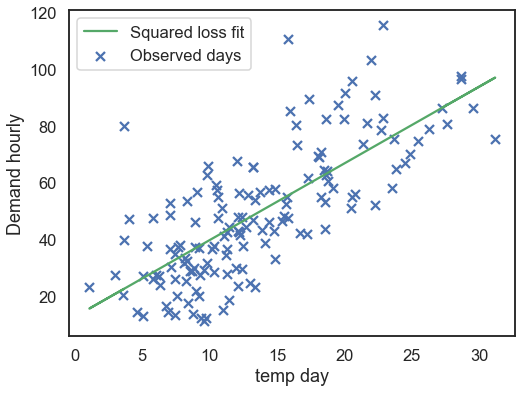

In [216]:
weather_utilization_regression(duesseldorf,"compensated")

weather_utilization_regression(duesseldorf,"absolute")



[0.64963572] 14.387423654858587
[-3.23700736] 17.403323099404698
[1.1157898] 4.760487299524614
[-20.68187295] 492.2698325945259
[-381.20240355] 409.43058741517575
[18.26121126] 168.49777701415158


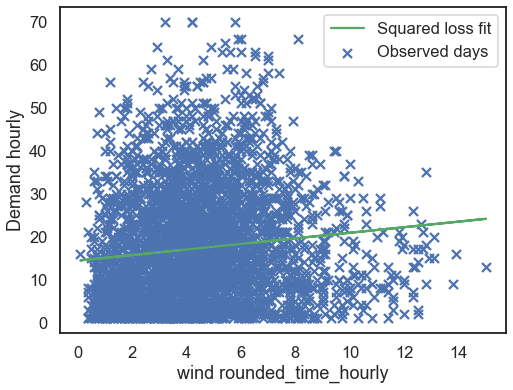

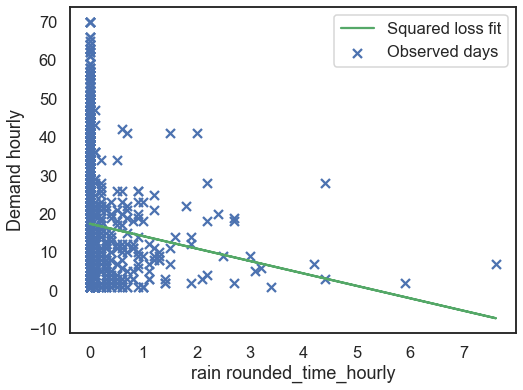

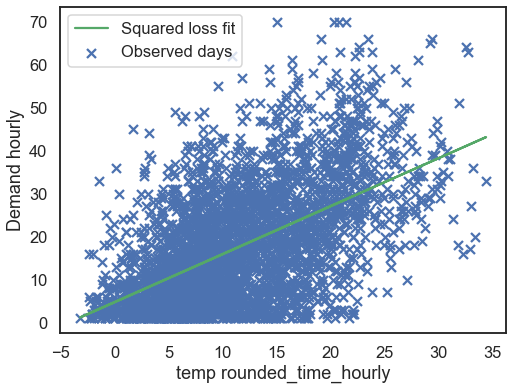

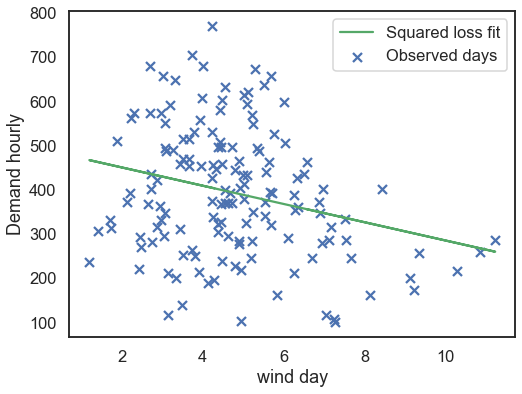

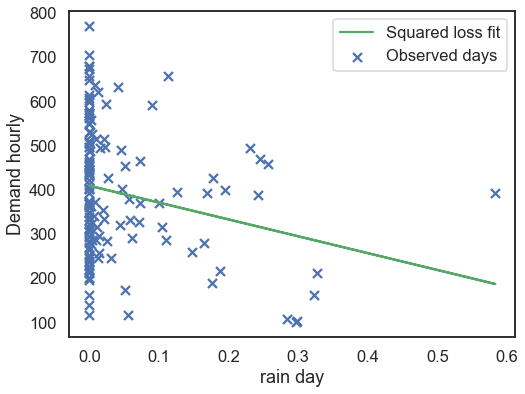

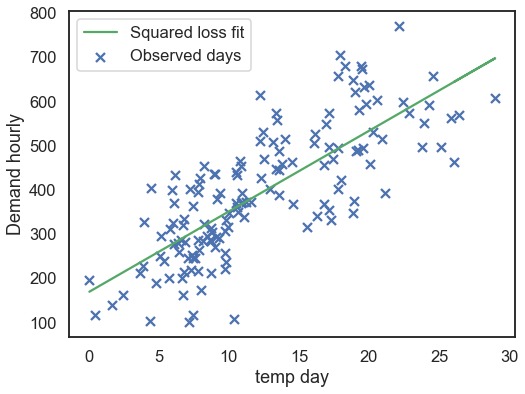

In [224]:
bremen = read_data("bremen")
weather_utilization_regression(bremen,"absolute")